In [1]:

"""


cifar10 dataset 
60,000 32×32 pixel images divided into 10 classes.

0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck


"""

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('dark_background')
import tensorflow as tf
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import normalize, to_categorical

2025-08-10 20:46:51.471450: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-10 20:46:51.482167: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754873211.494442    4640 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754873211.498096    4640 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754873211.507214    4640 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [43]:


# ### Normalize inputs
# #WHat happens if we don't normalize inputs?
# # ALso we may have to normalize depending on the activation function

# (X_train, y_train), (X_test, y_test) = cifar10.load_data()

# X_train = normalize(X_train, axis=1)
# X_test = normalize(X_test, axis=1)

# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)


In [44]:

# ######### Data augmentation

# train_datagen = ImageDataGenerator(rotation_range=45,
#     width_shift_range=0.2,
#     zoom_range = 0.2,
#     horizontal_flip = True)
# train_datagen.fit(X_train)

# train_generator = train_datagen.flow(
#     X_train,
#     y_train,
#     batch_size = 32)

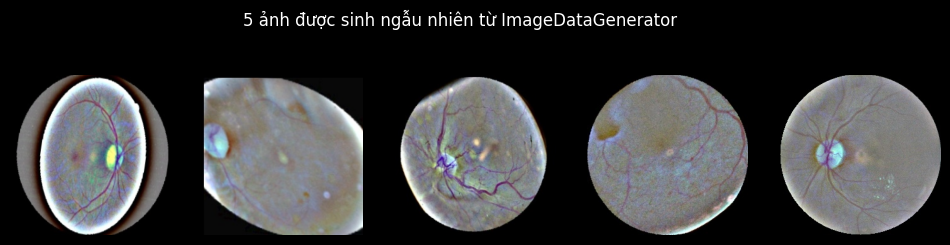

In [45]:
X_batch, y_batch = next(train_generator)

# Vẽ 5 ảnh đầu trong batch
plt.figure(figsize=(12,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_batch[i])
    plt.axis('off')
plt.suptitle("5 ảnh được sinh ngẫu nhiên từ ImageDataGenerator")
plt.show()

In [46]:
train_dir = 'train_preprocessed_augmented'
val_dir   = 'validation_preprocessed'
train_csv = 'augmented_labels.csv'
val_csv   = 'trainLabels/validation_updated.csv'

In [47]:
train_df = pd.read_csv(train_csv)
train_df['filename'] = train_df['image'].astype(str) + '.jpeg'
train_df['level']    = train_df['level'].astype(str)     # Keras cần string labels cho class_mode='categorical'

val_df = pd.read_csv(val_csv)
val_df['filename'] = val_df['image'].astype(str) + '.jpeg'
val_df['level']    = val_df['level'].astype(str)

# --- 3. Khởi tạo ImageDataGenerator chỉ với rescaling ---
datagen = ImageDataGenerator(rescale=1./255)

# --- 4. Tạo generator từ DataFrame ---
IMAGE_SIZE = 256  # hoặc kích thước bạn đang dùng trong model

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_dir,
    x_col='filename',
    y_col='level',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='categorical',
    batch_size=16,
    shuffle=True
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=val_dir,
    x_col='filename',
    y_col='level',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='categorical',
    batch_size=16,
    shuffle=False
)

Found 115118 validated image filenames belonging to 5 classes.
Found 1000 validated image filenames belonging to 5 classes.


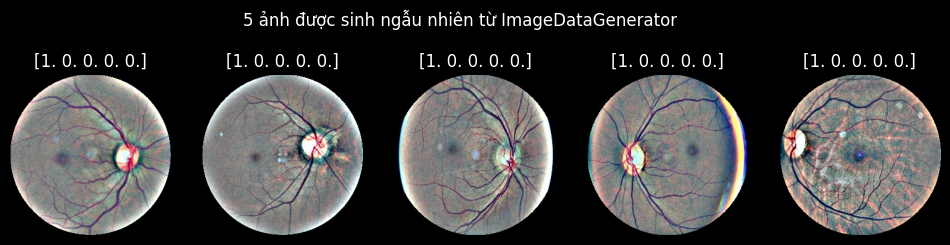

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [48]:
X_batch, y_batch = next(validation_generator)

# Vẽ 5 ảnh đầu trong batch
plt.figure(figsize=(12,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_batch[i])
    plt.title(y_batch[i])
    plt.axis('off')
plt.suptitle("5 ảnh được sinh ngẫu nhiên từ ImageDataGenerator")
plt.show()
X_batch[i]

In [49]:
val_df

,image,level,filename
0,17123_right,0,17123_right.jpeg
1,12616_right,0,12616_right.jpeg
2,6541_left,0,6541_left.jpeg
3,14418_right,0,14418_right.jpeg
4,39598_left,0,39598_left.jpeg
...,...,...,...
995,39188_right,4,39188_right.jpeg
996,33236_right,4,33236_right.jpeg
997,39164_right,4,39164_right.jpeg
998,6096_right,4,6096_right.jpeg


In [50]:
train_generator

In [51]:




######################################################################
activation = 'sigmoid'
model = Sequential()
model.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape=(256, 256, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D())

model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation = activation, kernel_initializer = 'he_uniform'))
model.add(Dense(5, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary()) 

##################################################################


history =model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    # callbacks=…
)




/home/duc/Documents/DoAn/myvenv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,301 (294.14 KB)

 Trainable params: 74,917 (292.64 KB)

 Non-trainable params: 384 (1.50 KB)

/home/duc/Documents/DoAn/myvenv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


None
Epoch 1/25


2025-08-08 08:00:42.505182: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1017', 8 bytes spill stores, 8 bytes spill loads



3947/7195 ━━━━━━━━━━━━━━━━━━━━ 4:27 82ms/step - accuracy: 0.4569 - loss: 1.2184

2025-08-08 08:06:20.236595: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1012', 8 bytes spill stores, 8 bytes spill loads

2025-08-08 08:06:20.407648: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1017', 8 bytes spill stores, 8 bytes spill loads



7195/7195 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.4816 - loss: 1.1652

2025-08-08 08:11:00.728258: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_171', 8 bytes spill stores, 8 bytes spill loads



7195/7195 ━━━━━━━━━━━━━━━━━━━━ 622s 84ms/step - accuracy: 0.5277 - loss: 1.0629 - val_accuracy: 0.2330 - val_loss: 5.7896
Epoch 2/25
7195/7195 ━━━━━━━━━━━━━━━━━━━━ 591s 82ms/step - accuracy: 0.6049 - loss: 0.8903 - val_accuracy: 0.2760 - val_loss: 2.8641
Epoch 3/25
7195/7195 ━━━━━━━━━━━━━━━━━━━━ 591s 82ms/step - accuracy: 0.6232 - loss: 0.8451 - val_accuracy: 0.2160 - val_loss: 12.6246
Epoch 4/25
7195/7195 ━━━━━━━━━━━━━━━━━━━━ 591s 82ms/step - accuracy: 0.6528 - loss: 0.7917 - val_accuracy: 0.2730 - val_loss: 6.1359
Epoch 5/25
7195/7195 ━━━━━━━━━━━━━━━━━━━━ 591s 82ms/step - accuracy: 0.6662 - loss: 0.7621 - val_accuracy: 0.2000 - val_loss: 18.4307
Epoch 6/25
7195/7195 ━━━━━━━━━━━━━━━━━━━━ 590s 82ms/step - accuracy: 0.6757 - loss: 0.7431 - val_accuracy: 0.2680 - val_loss: 5.0783
Epoch 7/25
7195/7195 ━━━━━━━━━━━━━━━━━━━━ 590s 82ms/step - accuracy: 0.6809 - loss: 0.7325 - val_accuracy: 0.3360 - val_loss: 3.9125
Epoch 8/25
7195/7195 ━━━━━━━━━━━━━━━━━━━━ 591s 82ms/step - accuracy: 0.6838 - 

In [54]:
model.save("test.keras")

In [55]:
load_model=tf.keras.models.load_model("test.keras")

In [ ]:
filenames = [
    '19005_right.jpeg',
    '24656_left.jpeg',
    '10651_left.jpeg',
    '6290_right.jpeg',
    '43080_right'
]

for fname in filenames:
    # 1) Load và resize
    path = os.path.join(val_dir, fname)
    img = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    # 2) Chuyển thành array và scale về [0,1]
    x = img_to_array(img) / 255.0
    # 3) Thêm batch dim
    x = np.expand_dims(x, axis=0)  # shape (1, H, W, 3)
    
    # 4) Predict
    preds = model.predict(x)       # shape (1, num_classes)
    class_idx = np.argmax(preds, axis=1)[0]
    
    print(f"{fname} → predicted class = {class_idx}, probs = {preds.flatten()}")

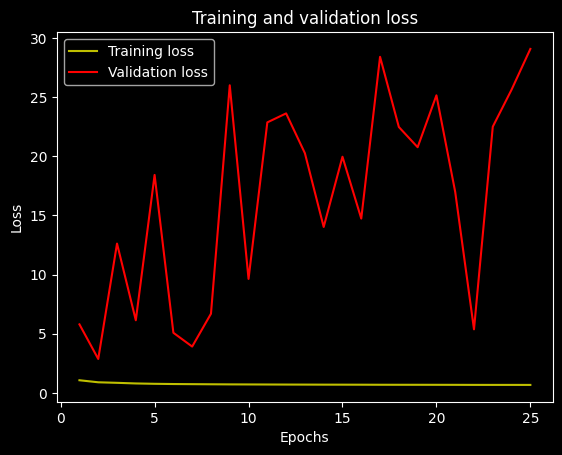

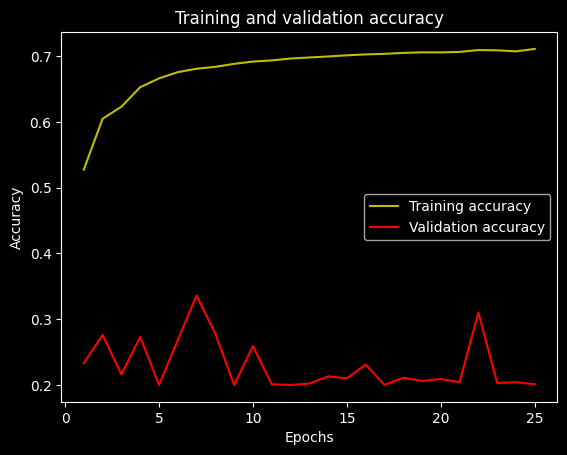

In [53]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [3]:
y_int = tf.cast(1, tf.int32)
thresholds = tf.constant([1, 2, 3, 4], dtype=tf.int32)  # (4,)
y_exp = tf.expand_dims(y_int, axis=-1)                  # (B,1)
a=tf.cast(y_exp >= thresholds, tf.float32)
print(thresholds)
print(y_exp)
print(a)

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
tf.Tensor([1], shape=(1,), dtype=int32)
tf.Tensor([1. 0. 0. 0.], shape=(4,), dtype=float32)
